# 🏠 Mini-Project: Preprocess & Engineer Features on Ames Housing Dataset

> **Goal: Work with the [Ames Housing dataset](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset?select=AmesHousing.csv) to perform data preprocessing and create meaningful new features. You will:**
> - Handle **missing values**, **duplicates**, and **outliers**  
> - Detect and fix **skewness** in numerical features  
> - Encode categorical variables into numeric formats  
> - Create **non-linear features** (e.g., polynomial, log, interaction terms) from existing variables  
> - Save the cleaned and enriched dataset into a new CSV file  

<p align="center">📢⚠️📂</p>

<p align="center"> Please name your file using the format: <code>assignmentName_nickname.py/.ipynb</code> (e.g., <code>project2_rezashokrzad.py</code>) and push it to GitHub with a clear commit message.</p>

<p align="center"> 🚨📝🧠</p>


## 🔹 Step 1: Load the Dataset


In [ ]:
# TODO: Load the Ames Housing dataset into a DataFrame.
# Hint: The dataset is available on Kaggle ("Ames Housing").
# After loading, display the first and last 5 rows to check if it worked.

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to the file you'd like to load
file_path = "AmesHousing.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "prevek18/ames-housing-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

pd.set_option("display.max_columns", None)
df


/tmp/ipython-input-2615325461.py:18: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 941k/941k [00:00<00:00, 5.43MB/s]


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,

## 🔹 Step 2: Exploratory Data Review (EDR)

In [ ]:
# TODO: Perform initial exploration of the dataset.
# - Check shape, column names, smaples
# - Get summary info, data types
# - Descriptive statistics

print(df.shape)
print(df.columns)
df.sample()
df.info()
df.describe(include="all")

(2930, 82)
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr B

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930,2930,2930,1155,2907.000000,2930,2930,2930,2850,2850,2847,2850,2929.000000,2849,2929.000000,2929.000000,2929.000000,2930,2930,2930,2929,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930.000000,2930,2930.000000,1508,2773,2771.000000,2771,2929.000000,2929.000000,2771,2771,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,8,16,17,4,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,8,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,NaN,NaN,NaN,NaN,2321,2887,1026,1015,880,NaN,1799,2549,1310,1283,2616,1906,859,NaN,2499,NaN,NaN,NaN,2885,1495,2734,2682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494,NaN,2728,NaN,744,1731,NaN,1231,NaN,NaN,2615,2665,2652,NaN,NaN,NaN,NaN,NaN,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.094881,5.563140,1971.356314,1984.266553,NaN,NaN,NaN,NaN,NaN,101.896801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.629566,NaN,49.722431,559.262547,1051.614544,NaN,NaN,NaN,NaN,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,NaN,6.443003,NaN,0.599317,NaN,NaN,1978.132443,NaN,1.766815,472.819734,NaN,NaN,NaN,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.411026,1.111537,30.245361,20.860286,NaN,NaN,NaN,NaN,NaN,179.112611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.590839,NaN,169.168476,439.494153,440.615067,NaN,NaN,NaN,NaN,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,NaN,1.572964,NaN,0.647921,NaN,NaN,25.528411,NaN,0.760566,215.046549,NaN,NaN,NaN,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,

## 🔹 Step 3: Missing Value Check & Handling

In [ ]:
# TODO: Check missing values.
# Decide on a strategy (if needed):
# - Drop if too many are missing
# - Fill with mean/median/mode/domain-specific value

df.isna().sum()
df.isna().sum()[df.isna().sum() > 0] # list of all missing
df = df.drop(df.isna().sum()[df.isna().sum() > 100].index, axis=1) # drop the features with too many missing

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0]) # fill the cat columns with mode
df[num_cols] = df[num_cols].fillna(df[num_cols].median()) # fill the remaining num columns with median
df.isna().sum().sum()

np.int64(0)

## 🔹 Step 4: Correlation Check & Feature Decision

/tmp/ipython-input-1664528707.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sale_price_correlation.values, y=sale_price_correlation.index, palette='coolwarm')


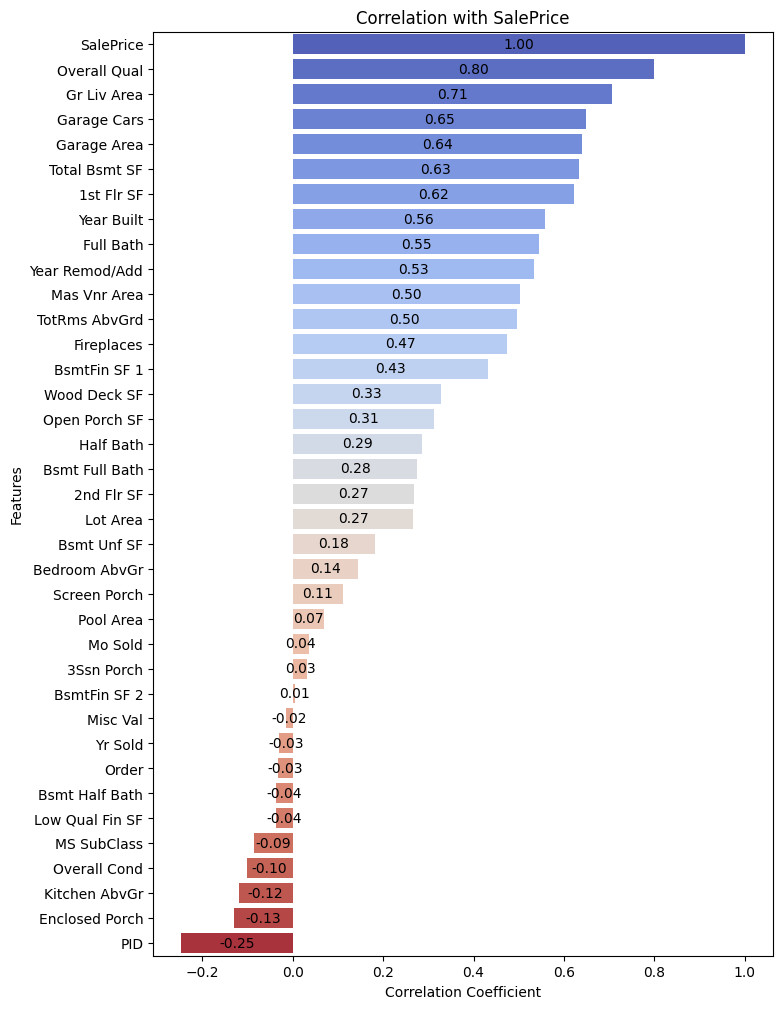

In [ ]:
# TODO: Check correlations between numerical features and target variable (SalePrice).
# Use correlation heatmap or pairplot.
# Decide which features to keep/remove based on correlation.

correlation_matrix = df.corr(numeric_only=True)

# Get correlations with SalePrice
sale_price_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Plot correlations with SalePrice
plt.figure(figsize=(8, 12))
ax = sns.barplot(x=sale_price_correlation.values, y=sale_price_correlation.index, palette='coolwarm')
plt.title('Correlation with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')

plt.show()

# droping features based on correlation
if 'Overall Qual' in df.columns:
  df = df.drop("Overall Qual", axis=1)

## 🔹 Step 5: Encode Categorical Variables

In [ ]:
# TODO: Identify categorical variables.
# Use methods like:
# - One-hot encoding
# - Ordinal encoding
# Decide what makes sense for each feature.

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist() # needed for next step
for col in cat_cols:
  print(col + " : " + str(df[col].unique()))

# Ordinal encoding (features with a natural order)
ordinal_mappings = {
    # Lot shape: irregular (IR3 worst) -> regular (Reg best)
    "Lot Shape":                ["IR3", "IR2", "IR1", "Reg"],

    # Land slope: severe -> mod -> gentle
    "Land Slope":               ["Sev", "Mod", "Gtl"],

    # Exterior / basement / kitchen / heating qualities: poor -> excellent
    "Exter Qual":               ["Po", "Fa", "TA", "Gd", "Ex"],
    "Exter Cond":               ["Po", "Fa", "TA", "Gd", "Ex"],

    # Basement quality/condition: treat missing as 'None' (no basement)
    "Bsmt Qual":                ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Cond":                ["None", "Po", "Fa", "TA", "Gd", "Ex"],

    # Bsmt exposure: none -> minimal -> average -> good
    "Bsmt Exposure":            ["None", "No", "Mn", "Av", "Gd"],

    # BsmtFin types: unfinished -> GLQ (best)
    "BsmtFin Type 1":          ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFin Type 2":          ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],

    # Heating / kitchen quality: poor -> excellent
    "Heating QC":               ["Po", "Fa", "TA", "Gd", "Ex"],
    "Kitchen Qual":             ["Po", "Fa", "TA", "Gd", "Ex"],

    # Functional: worst -> typical
    "Functional":               ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],

    # Paved drive: none -> partial -> yes
    "Paved Drive":              ["N", "P", "Y"],
}

# Check the columns in the dict are present
missing_cols = [c for c in ordinal_mappings if c not in df.columns]
if missing_cols:
    raise KeyError(f"These ordinal columns are not in df: {missing_cols}")

# Fill missing with 'None' when 'None' is part of the specified categories,
# otherwise leave NaN (OrdinalEncoder will error if unseen values exist).
for col, order in ordinal_mappings.items():
    if "None" in order:
        df[col] = df[col].fillna("None")

# Apply OrdinalEncoder one column at a time (safe: ensures categories list matches)
for col, order in ordinal_mappings.items():
    oe = OrdinalEncoder(categories=[order])
    # reshape to 2D for sklearn
    df[[col]] = oe.fit_transform(df[[col]])

# If you want integers instead of floats:
df[ list(ordinal_mappings.keys()) ] = df[ list(ordinal_mappings.keys()) ].astype(int)

# One-hot encoding (features with no order, purely categorical labels)
onehot_features = [
    "MS Zoning",
    "Street",
    "Land Contour",
    "Utilities",
    "Lot Config",
    "Neighborhood",
    "Condition 1",
    "Condition 2",
    "Bldg Type",
    "House Style",
    "Roof Style",
    "Roof Matl",
    "Exterior 1st",
    "Exterior 2nd",
    "Foundation",
    "Heating",
    "Central Air",
    "Electrical",
    "Sale Type",
    "Sale Condition",
]

ohe = OneHotEncoder(drop="first", sparse_output=False) # Set sparse_output to False
encoded = ohe.fit_transform(df[onehot_features])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(onehot_features), index=df.index)
df = pd.concat([df.drop(columns=onehot_features), encoded_df], axis=1)

df

MS Zoning : ['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']
Street : ['Pave' 'Grvl']
Lot Shape : ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour : ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities : ['AllPub' 'NoSewr' 'NoSeWa']
Lot Config : ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']
Land Slope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
Condition 1 : ['Norm' 'Feedr' 'PosN' 'RRNe' 'RRAe' 'Artery' 'PosA' 'RRAn' 'RRNn']
Condition 2 : ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery' 'RRNn' 'RRAe' 'RRAn']
Bldg Type : ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
House Style : ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']
Roof Style : ['Hip' 'Gable' 'Mansard' 'Gambrel' 'Shed' 'Flat']
Roof Matl : ['CompShg' 'WdShake' 'Tar&Grv' 'WdShngl

,Order,PID,MS SubClass,Lot Area,Lot Shape,Land Slope,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,31770,2,2,5,1960,1960,112.0,2,2,3,4,4,4,639.0,1,0.0,441.0,1080.0,1,1656,0,0,1656,1.0,0.0,1,0,3,1,2,7,7,2,2.0,528.0,1,210,62,0,0,0,0,0,5,2010,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,526350040,20,11622,3,2,6,1961,1961,0.0,2,2,3,3,1,3,468.0,2,144.0,270.0,882.0,2,896,0,0,896,0.0,0.0,1,0,2,

## 🔹 Step 6: Feature Scaling

In [ ]:
# TODO: Try different scaling techniques:
# - StandardScaler
# - MinMaxScaler
# - RobustScaler
# Decide based on the distribution of features.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df


,Order,PID,MS SubClass,Lot Area,Lot Shape,Land Slope,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.000000,0.000000,0.000000,0.142420,2,2,0.500,0.637681,0.166667,0.07000,2,2,3,4,4,4,0.113218,1,0.000000,0.188784,0.176759,1,0.277673,0.000000,0.0,0.249058,0.333333,0.0,0.25,0.0,0.375,0.333333,2,0.384615,7,0.50,0.4,0.354839,1,0.147472,0.083558,0.0,0.0,0.000000,0.0,0.000000,0.363636,1.0,0.272444,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1

## 🔹 Step 7: Feature Selection & Feature Creation 💡

In [ ]:
# TODO: Create at least 2 NEW features.
# Examples:
# - Age of house: df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
# - Interaction: df["Quality_x_Size"] = df["OverallQual"] * df["GrLivArea"]
# - Non-linear: df["Log_LotArea"] = np.log1p(df["LotArea"])

created_features = []

# Create 'HouseAge' feature
if "Yr Sold" in df.columns and "Year Built" in df.columns:
  df["HouseAge"] = df["Yr Sold"] - df["Year Built"]
  created_features.append('HouseAge')
else:
  print("Skipping 'HouseAge' creation: 'Yr Sold' or 'Year Built' not found.")

# Create 'Log_LotArea' feature
if "Lot Area" in df.columns:
    df["Log_LotArea"] = np.log1p(df["Lot Area"])
    created_features.append('Log_LotArea')
else:
    print("Skipping 'Log_LotArea' creation: 'Lot Area' not found.")

# Create 'TotalSF' feature (sum of basement, first, and second floor square footage)
if "Total Bsmt SF" in df.columns and "1st Flr SF" in df.columns and "2nd Flr SF" in df.columns:
  df["TotalSF"] = df["Total Bsmt SF"] + df["1st Flr SF"] + df["2nd Flr SF"]
  created_features.append('TotalSF')
else:
    print("Skipping 'TotalSF' creation: Required SF columns not found.")

# Inform the user if 'Quality_x_Size' could not be created
if "Overall Qual" not in df.columns:
    print("Skipping 'Quality_x_Size' creation: 'Overall Qual' not found.")


# Display the first few rows with the new features, if they were created
if created_features:
    display(df[created_features].head())
else:
    print("No new features were created.")


Skipping 'Quality_x_Size' creation: 'Overall Qual' not found.


,HouseAge,Log_LotArea,TotalSF
0,0.362319,0.133149,0.454432
1,0.355072,0.047118,0.262396
2,0.376812,0.058843,0.426502
3,0.304348,0.045056,0.718366
4,0.094203,0.056916,0.616113


In [ ]:
# TODO: Select the most useful features.
# Try:
# - Correlation thresholding and Removing highly collinear features
# - decide yourself for dropping useless ones

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Set a correlation threshold
threshold = 0.8

# Find highly correlated features
highly_correlated_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            highly_correlated_pairs.add(tuple(sorted((col1, col2)))) # Store pairs alphabetically

# Decide which feature to drop from each pair
features_to_drop = set()
for col1, col2 in highly_correlated_pairs:
    # Ensure 'SalePrice' is not considered for dropping
    if 'SalePrice' in [col1, col2]:
        continue

    # Check if both columns exist in the correlation matrix before accessing
    if col1 in correlation_matrix.columns and col2 in correlation_matrix.columns:
        corr_col1_saleprice = abs(correlation_matrix.loc[col1, 'SalePrice'])
        corr_col2_saleprice = abs(correlation_matrix.loc[col2, 'SalePrice'])

        if corr_col1_saleprice < corr_col2_saleprice:
            features_to_drop.add(col1)
        else:
            features_to_drop.add(col2)
    else:
        # If one or both columns are not in the correlation matrix, skip the pair
        print(f"Skipping highly correlated pair ({col1}, {col2}) as one or both columns are not in the correlation matrix.")


features_to_drop = list(features_to_drop)

print(f"Dropping highly correlated features: {features_to_drop}")
df = df.drop(columns=features_to_drop, errors='ignore')



Dropping highly correlated features: ['Yr Sold', 'MS Zoning_FV', 'Exterior 2nd_CmentBd', '1st Flr SF', 'TotRms AbvGrd', 'Exterior 2nd_HdBoard', 'Garage Area', 'Exterior 2nd_VinylSd', 'MS Zoning_RL', 'Exterior 2nd_Wd Sdng', 'Roof Style_Gable', 'House Style_2Story', 'Lot Area', 'TotalSF', 'Exterior 2nd_MetalSd', 'Exterior 2nd_PreCast', 'Sale Condition_Partial', 'BsmtFin SF 2']


## 🔹 Step 8: Outlier Handling

In [ ]:
# TODO: Detect and handle outliers.
# Methods:
# - IQR rule
# - Z-score
# - Visualization (boxplots, scatterplots)

# using IQR rule for capping
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

print("Outliers capped using the IQR rule.")

Outliers capped using the IQR rule.


## 🔹 Step 9: Skewness Handling

In [ ]:
# TODO: Check skewness of numerical features.
# Apply log, sqrt, Box-Cox, or Yeo-Johnson depending on distribution.

# Get all columns except the target variable 'SalePrice'
numerical_cols = df.columns.tolist()
if 'SalePrice' in numerical_cols:
    numerical_cols.remove('SalePrice')


# Check skewness of numerical features
skewness = df[numerical_cols].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n", skewness)

# Identify features with skewness above a threshold
skewed_features = skewness[abs(skewness) > 0.75].index

# Apply log transformation (np.log1p) to skewed numerical features
for feature in skewed_features:
    # Check if feature exists before applying transformation
    if feature in df.columns:
        df[feature] = np.log1p(df[feature])
        print(f"Applied log transformation to {feature}")
    else:
        print(f"Skipping transformation: {feature} not found after previous steps.")

Skewness of numerical features:
 Mas Vnr Area         1.308931
Open Porch SF        1.157661
Wood Deck SF         1.091961
Bsmt Exposure        1.066588
MS SubClass          0.981597
                       ...   
Year Remod/Add      -0.451863
Heating QC          -0.544473
Year Built          -0.595166
Lot Config_Inside   -1.038809
Lot Shape           -1.081855
Length: 174, dtype: float64
Applied log transformation to Mas Vnr Area
Applied log transformation to Open Porch SF
Applied log transformation to Wood Deck SF
Applied log transformation to Bsmt Exposure
Applied log transformation to MS SubClass
Applied log transformation to 2nd Flr SF
Applied log transformation to Bsmt Unf SF
Applied log transformation to BsmtFin SF 1
Applied log transformation to Exter Qual
Applied log transformation to Lot Config_Inside
Applied log transformation to Lot Shape


## 🔹 Step 10: Remove Duplicates

In [ ]:
# TODO: Check and remove duplicate rows if there is.
print(df.duplicated().sum())
df = df.drop_duplicates()




0


## 💾 Step 11: Save Cleaned Dataset

In [ ]:
# Save your final cleaned and engineered dataset to CSV.
df.to_csv("AmesHousing_engineered.csv", index=False)
print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!
